In [1]:
#Importing libraries

import pandas as pd
import numpy as np
from collections import defaultdict
#import lightgbm as lgb
from scipy.sparse import vstack, hstack, csr_matrix, spmatrix
from scipy.stats import binom
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer as CV
import datetime
import gc
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#from nltk.stem.porter import PorterStemmer
#from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import TimeSeriesSplit
import math
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import xgboost as xgb
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from nltk.corpus import stopwords

import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.models import LdaModel

from sklearn.decomposition import NMF, LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, concatenate, GlobalMaxPooling1D, add 
from keras.layers import LSTM, SpatialDropout1D, Input, Dense, Bidirectional, CuDNNLSTM, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.utils import np_utils
from scipy.sparse import coo_matrix
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Bidirectional

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('D:/APPLIEDAI/souravD/data/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

In [4]:
# denoting duplicate rows
data[data.duplicated(['comment_text','target'], keep=False)]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
35,239616,0.0,Awesome!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-13 22:04:25.696800+00,6,NaN,26672,approved,0,0,0,2,0,0.0,4,4
140,239792,0.0,Me too!,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-16 17:01:47.809235+00,6,239791.0,30130,approved,0,0,0,0,0,0.0,0,6
283,240303,0.0,I agree!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-14 07:01:48.643030+00,111,NaN,32846,approved,0,0,0,0,0,0.0,4,4
284,240304,0.0,Star Wars has a wow factor that Star Trek doesn't match even though I'm a larger Trek fan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-07 19:40:44.040214+00,111,NaN,32846,approved,0,0,0,1,0,0.0,0,4
285,240306,0.0,Star Wars is the best!,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-13 22:50:34.482433+00,111,NaN,32846,approved,0,0,0,0,0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804589,6333458,0.0,"What? Do tell. Include more than one source, please.",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 23:33:32.075431+00,102,6332005.0,399200,approved,0,0,0,0,0,0.0,0,4
1804597,6333469,0.0,"What? Do tell. Include more than one source, please.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-10 23:35:30.107923+00,102,6332662.0,399200,approved,0,0,0,0,0,0.0,4,4
1804606,6333483,0.0,How?,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 23:36:43.878969+00,102,6333471.0,399518,approved,0,0,0,0,0,0.0,0,4
1804654,6333556,0.0,Exactly.,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 23:49:10.659920+00,102,6332840.0,399242,rejected,0,0,0,0,0,0.0,0,4


In [5]:
data.shape

(1804874, 45)

In [6]:
data[data['id']==240344]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
318,240344,0.0,How can the author claim that Star Wars is better when he hasn’t even seen Star Trek?!,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-21 21:38:14.744261+00,111,NaN,32846,approved,0,0,0,1,0,0.0,0,4


In [7]:
data[data['id']==282368]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
33284,282368,0.0,How can the author claim that Star Wars is better when he hasn’t even seen Star Trek?!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-21 21:38:14.744261+00,22,NaN,59527,approved,0,0,0,1,0,0.0,4,4


In [8]:
data.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


In [9]:
data.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.00000,1.804874e+06,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,0.001410,0.095268,0.127670,0.003237,0.001457,0.025611,0.001088,0.017863,0.006127,0.108687,0.049460,0.001220,0.000884,0.008248,0.006761,0.001494,0.001356,0.012083,0.006724,0.05695,4.986296e+01,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,0.030923,0.256671,0.305384,0.045801,0.030862,0.143739,0.016032,0.122145,0.058684,0.267894,0.202459,0.014102,0.011853,0.042717,0.037504,0.015374,0.017505,0.089183,0.069027,0.21596,2.769869e+01,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.100000e+01,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.400000e+01,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.400000e+01,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

In [10]:
def convert_to_bool(df, col_name, col_bool):
    df[col_bool] = np.where(df[col_name] >= 0.5, 1, 0)       

def convert_dataframe_to_bool(df, columns, col_bool):        
    bool_df = df.copy()
    convert_to_bool(bool_df, columns, col_bool)
    #for col in columns:
        #convert_to_bool(bool_df, col)
    return bool_df


In [11]:
#Fill NA/NaN values using 0
data.fillna(0, inplace = True)

#Converting target to binary values (1 or 0)
data = convert_dataframe_to_bool(data, ['target'], 'target_bool')

In [12]:
data.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,target_bool
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:41.987077+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:42.870083+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:45.222647+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:47.601894+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,0.0,2006,rejected,0,0,0,1,0,0.0,4,47,1


In [13]:
print("\nTotal number of points in both classes:")

data['target_bool'].value_counts()


Total number of points in both classes:


0    1660540
1    144334 
Name: target_bool, dtype: int64

<Figure size 720x720 with 0 Axes>

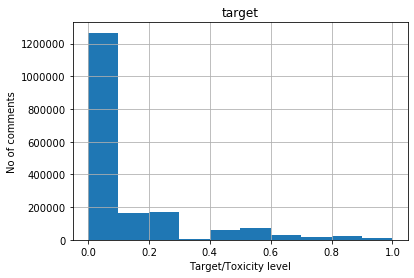

In [14]:
#Visualizing the distribution of toxic comments
fig = plt.figure(figsize=(10,10))
data.hist(column='target')
plt.xlabel("Target/Toxicity level")
plt.ylabel("No of comments")
plt.show()

In [15]:
# Sort by publication_id
sorted_data=data.sort_values('publication_id', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [16]:
# Removing duplicates
final=sorted_data.drop_duplicates(subset={"comment_text","target_bool"}, keep='first', inplace=False)
final.shape

(1781419, 46)

In [17]:
#Checking to see how much % of data still remains

(final['id'].size*1.0)/(data['id'].size*1.0)*100

98.70046330103929

In [18]:
final['target_bool'].value_counts()

0    1638660
1    142759 
Name: target_bool, dtype: int64

In [19]:
contraction_mapping = {
    "Trump's" : 'trump is',"'cause": 'because',',cause': 'because',';cause': 'because',"ain't": 'am not','ain,t': 'am not',
    'ain;t': 'am not','ain´t': 'am not','ain’t': 'am not',"aren't": 'are not',
    'aren,t': 'are not','aren;t': 'are not','aren´t': 'are not','aren’t': 'are not',"can't": 'cannot',"can't've": 'cannot have','can,t': 'cannot','can,t,ve': 'cannot have',
    'can;t': 'cannot','can;t;ve': 'cannot have',
    'can´t': 'cannot','can´t´ve': 'cannot have','can’t': 'cannot','can’t’ve': 'cannot have',
    "could've": 'could have','could,ve': 'could have','could;ve': 'could have',"couldn't": 'could not',"couldn't've": 'could not have','couldn,t': 'could not','couldn,t,ve': 'could not have','couldn;t': 'could not',
    'couldn;t;ve': 'could not have','couldn´t': 'could not',
    'couldn´t´ve': 'could not have','couldn’t': 'could not','couldn’t’ve': 'could not have','could´ve': 'could have',
    'could’ve': 'could have',"didn't": 'did not','didn,t': 'did not','didn;t': 'did not','didn´t': 'did not',
    'didn’t': 'did not',"doesn't": 'does not','doesn,t': 'does not','doesn;t': 'does not','doesn´t': 'does not',
    'doesn’t': 'does not',"don't": 'do not',"Don't": 'do not','don,t': 'do not','don;t': 'do not','don´t': 'do not',"They're":'they are','don’t': 'do not','Don’t': 'do not',
    "hadn't": 'had not',"hadn't've": 'had not have','hadn,t': 'had not','hadn,t,ve': 'had not have','hadn;t': 'had not',
    'hadn;t;ve': 'had not have','hadn´t': 'had not','hadn´t´ve': 'had not have','hadn’t': 'had not','hadn’t’ve': 'had not have',"hasn't": 'has not','hasn,t': 'has not','hasn;t': 'has not','hasn´t': 'has not','hasn’t': 'has not',
    "haven't": 'have not','haven,t': 'have not','haven;t': 'have not','haven´t': 'have not','haven’t': 'have not',"he'd": 'he would',
    "he'd've": 'he would have',"he'll": 'he will',
    "he's": 'he is',"He's": 'he is','he,d': 'he would','he,d,ve': 'he would have','he,ll': 'he will','he,s': 'he is','he;d': 'he would',
    'he;d;ve': 'he would have','he;ll': 'he will','he;s': 'he is','he´d': 'he would','he´d´ve': 'he would have','he´ll': 'he will',
    'he´s': 'he is','he’d': 'he would','he’d’ve': 'he would have','he’ll': 'he will','he’s': 'he is',"how'd": 'how did',"how'll": 'how will',
    "how's": 'how is','how,d': 'how did','how,ll': 'how will','how,s': 'how is','how;d': 'how did','how;ll': 'how will',
    'how;s': 'how is','how´d': 'how did','how´ll': 'how will','how´s': 'how is','how’d': 'how did','how’ll': 'how will',
    'how’s': 'how is',"i'd": 'i would',"I'd": 'i would',"i'll": 'i will',"I'll": 'i will',"i'm": 'i am',"I'm": 'i am',"i've": 'i have',"I've": 'i have','i,d': 'i would','i,ll': 'i will',
    'i,m': 'i am','i,ve': 'i have','i;d': 'i would','i;ll': 'i will','i;m': 'i am','i;ve': 'i have',"isn't": 'is not',
    'isn,t': 'is not','isn;t': 'is not','isn´t': 'is not','isn’t': 'is not',"it'd": 'it would',"it'll": 'it will',"It's":'it is',
    "it's": 'it is','it,d': 'it would','it,ll': 'it will','it,s': 'it is','it;d': 'it would','it;ll': 'it will','it;s': 'it is','it´d': 'it would','it´ll': 'it will','it´s': 'it is',
    'it’d': 'it would','it’ll': 'it will','it’s': 'it is',"It's":'it is',
    'i´d': 'i would','i´ll': 'i will','i´m': 'i am','i´ve': 'i have','i’d': 'i would','i’ll': 'i will','i’m': 'i am','I’m': 'i am',
    'i’ve': 'i have','I’ve': 'i have',"let's": 'let us','let,s': 'let us','let;s': 'let us','let´s': 'let us',
    'let’s': 'let us',"ma'am": 'madam','ma,am': 'madam','ma;am': 'madam',"mayn't": 'may not','mayn,t': 'may not','mayn;t': 'may not',
    'mayn´t': 'may not','mayn’t': 'may not','ma´am': 'madam','ma’am': 'madam',"might've": 'might have','might,ve': 'might have','might;ve': 'might have',"mightn't": 'might not','mightn,t': 'might not','mightn;t': 'might not','mightn´t': 'might not',
    'mightn’t': 'might not','might´ve': 'might have','might’ve': 'might have',"must've": 'must have','must,ve': 'must have','must;ve': 'must have',
    "mustn't": 'must not','mustn,t': 'must not','mustn;t': 'must not','mustn´t': 'must not','mustn’t': 'must not','must´ve': 'must have',
    'must’ve': 'must have',"needn't": 'need not','needn,t': 'need not','needn;t': 'need not','needn´t': 'need not','needn’t': 'need not',"oughtn't": 'ought not','oughtn,t': 'ought not','oughtn;t': 'ought not',
    'oughtn´t': 'ought not','oughtn’t': 'ought not',"sha'n't": 'shall not','sha,n,t': 'shall not','sha;n;t': 'shall not',"shan't": 'shall not',
    'shan,t': 'shall not','shan;t': 'shall not','shan´t': 'shall not','shan’t': 'shall not','sha´n´t': 'shall not','sha’n’t': 'shall not',
    "she'd": 'she would',"she'll": 'she will',"she's": 'she is','she,d': 'she would','she,ll': 'she will',
    'she,s': 'she is','she;d': 'she would','she;ll': 'she will','she;s': 'she is','she´d': 'she would','she´ll': 'she will',
    'she´s': 'she is','she’d': 'she would','she’ll': 'she will','she’s': 'she is',"should've": 'should have','should,ve': 'should have','should;ve': 'should have',
    "shouldn't": 'should not','shouldn,t': 'should not','shouldn;t': 'should not','shouldn´t': 'should not','shouldn’t': 'should not','should´ve': 'should have',
    'should’ve': 'should have',"that'd": 'that would',"that's": 'that is','that,d': 'that would','that,s': 'that is','that;d': 'that would',
    'that;s': 'that is','that´d': 'that would','that´s': 'that is','that’d': 'that would','that’s': 'that is',"there'd": 'there had',
    "there's": 'there is','there,d': 'there had','there,s': 'there is','there;d': 'there had','there;s': 'there is',
    'there´d': 'there had','there´s': 'there is','there’d': 'there had','there’s': 'there is',
    "they'd": 'they would',"they'll": 'they will',"they're": 'they are',"they've": 'they have',
    'they,d': 'they would','they,ll': 'they will','they,re': 'they are','they,ve': 'they have','they;d': 'they would','they;ll': 'they will','they;re': 'they are',
    'they;ve': 'they have','they´d': 'they would','they´ll': 'they will','they´re': 'they are','they´ve': 'they have','they’d': 'they would','they’ll': 'they will',
    'they’re': 'they are','they’ve': 'they have',"wasn't": 'was not','wasn,t': 'was not','wasn;t': 'was not','wasn´t': 'was not',
    'wasn’t': 'was not',"we'd": 'we would',"we'll": 'we will',"we're": 'we are',"we've": 'we have',"We've": 'we have','we,d': 'we would','we,ll': 'we will',
    'we,re': 'we are','we,ve': 'we have','we;d': 'we would','we;ll': 'we will','we;re': 'we are','we;ve': 'we have',
    "weren't": 'were not','weren,t': 'were not','weren;t': 'were not','weren´t': 'were not','weren’t': 'were not','we´d': 'we would','we´ll': 'we will',
    'we´re': 'we are','we´ve': 'we have','we’d': 'we would','we’ll': 'we will','we’re': 'we are','we’ve': 'we have','We’ve': 'we have',"what'll": 'what will',"what're": 'what are',"what's": 'what is',
    "what've": 'what have','what,ll': 'what will','what,re': 'what are','what,s': 'what is','what,ve': 'what have','what;ll': 'what will','what;re': 'what are',
    'what;s': 'what is','what;ve': 'what have','what´ll': 'what will',
    'what´re': 'what are','what´s': 'what is','what´ve': 'what have','what’ll': 'what will','what’re': 'what are','what’s': 'what is',
    'what’ve': 'what have',"where'd": 'where did',"where's": 'where is','where,d': 'where did','where,s': 'where is','where;d': 'where did',
    'where;s': 'where is','where´d': 'where did','where´s': 'where is','where’d': 'where did','where’s': 'where is',
    "who'll": 'who will',"who's": 'who is','who,ll': 'who will','who,s': 'who is','who;ll': 'who will','who;s': 'who is',
    'who´ll': 'who will','who´s': 'who is','who’ll': 'who will','who’s': 'who is',"won't": 'will not','won,t': 'will not','won;t': 'will not',
    'won´t': 'will not','won’t': 'will not',"wouldn't": 'would not','wouldn,t': 'would not','wouldn;t': 'would not','wouldn´t': 'would not',
    'wouldn’t': 'would not',"you'd": 'you would',"you'll": 'you will',"you're": 'you are','you,d': 'you would','you,ll': 'you will',
    'you,re': 'you are','you;d': 'you would','you;ll': 'you will',
    'you;re': 'you are','you´d': 'you would','you´ll': 'you will','you´re': 'you are','you’d': 'you would','you’ll': 'you will','you’re': 'you are',
    '´cause': 'because','’cause': 'because',"you've": "you have","could'nt": 'could not',
    "havn't": 'have not',"here’s": "here is",'i""m': 'i am',"i'am": 'i am',"i'l": "i will","i'v": 'i have',"wan't": 'want',"was'nt": "was not","who'd": "who would",
    "who're": "who are","who've": "who have","why'd": "why would","would've": "would have","y'all": "you all","y'know": "you know","you.i": "you i",
    "your'e": "you are","arn't": "are not","agains't": "against","c'mon": "common","doens't": "does not",'don""t': "do not","dosen't": "does not",
    "dosn't": "does not","shoudn't": "should not","that'll": "that will","there'll": "there will","there're": "there are",
    "this'll": "this all","u're": "you are", "ya'll": "you all","you'r": "you are","you’ve": "you have","d'int": "did not","did'nt": "did not","din't": "did not","dont't": "do not","gov't": "government",
    "i'ma": "i am","is'nt": "is not","‘I":'I',
    'ᴀɴᴅ':'and','ᴛʜᴇ':'the','ʜᴏᴍᴇ':'home','ᴜᴘ':'up','ʙʏ':'by','ᴀᴛ':'at','…and':'and','civilbeat':'civil beat',\
    'TrumpCare':'Trump care','Trumpcare':'Trump care', 'OBAMAcare':'Obama care','ᴄʜᴇᴄᴋ':'check','ғᴏʀ':'for','ᴛʜɪs':'this','ᴄᴏᴍᴘᴜᴛᴇʀ':'computer',\
    'ᴍᴏɴᴛʜ':'month','ᴡᴏʀᴋɪɴɢ':'working','ᴊᴏʙ':'job','ғʀᴏᴍ':'from','Sᴛᴀʀᴛ':'start','gubmit':'submit','CO₂':'carbon dioxide','ғɪʀsᴛ':'first',\
    'ᴇɴᴅ':'end','ᴄᴀɴ':'can','ʜᴀᴠᴇ':'have','ᴛᴏ':'to','ʟɪɴᴋ':'link','ᴏғ':'of','ʜᴏᴜʀʟʏ':'hourly','ᴡᴇᴇᴋ':'week','ᴇɴᴅ':'end','ᴇxᴛʀᴀ':'extra',\
    'Gʀᴇᴀᴛ':'great','sᴛᴜᴅᴇɴᴛs':'student','sᴛᴀʏ':'stay','ᴍᴏᴍs':'mother','ᴏʀ':'or','ᴀɴʏᴏɴᴇ':'anyone','ɴᴇᴇᴅɪɴɢ':'needing','ᴀɴ':'an','ɪɴᴄᴏᴍᴇ':'income',\
    'ʀᴇʟɪᴀʙʟᴇ':'reliable','ғɪʀsᴛ':'first','ʏᴏᴜʀ':'your','sɪɢɴɪɴɢ':'signing','ʙᴏᴛᴛᴏᴍ':'bottom','ғᴏʟʟᴏᴡɪɴɢ':'following','Mᴀᴋᴇ':'make',\
    'ᴄᴏɴɴᴇᴄᴛɪᴏɴ':'connection','ɪɴᴛᴇʀɴᴇᴛ':'internet','financialpost':'financial post', 'ʜaᴠᴇ':' have ', 'ᴄaɴ':' can ', 'Maᴋᴇ':' make ', 'ʀᴇʟɪaʙʟᴇ':' reliable ', 'ɴᴇᴇᴅ':' need ',
    'ᴏɴʟʏ':' only ', 'ᴇxᴛʀa':' extra ', 'aɴ':' an ', 'aɴʏᴏɴᴇ':' anyone ', 'sᴛaʏ':' stay ', 'Sᴛaʀᴛ':' start', 'SHOPO':'shop'," :‑)":'smiley',\
    " :)":'smiley'," :-]":'smiley'," :]":'smiley'," :‑D":'laughing'," :D":'laughing'," =D":'laughing'," :‑(":'sad'," :(":'sad'," ;)":'wink'," :P":'cheeky'
    }

In [20]:
ps = PorterStemmer()
ps.stem('inducing')

'induc'

In [21]:
sn = SnowballStemmer("english")
sn.stem('inducing')

'induc'

In [22]:
lm = WordNetLemmatizer()
ps.stem(lm.lemmatize('studies'))

'studi'

In [23]:
"".join([lm.lemmatize(token) for token in "Thank you!! This would make my life a lot less anxiety inducing. Keep it up, and don't let anyone get in your way!"])

"Thank you!! This would make my life a lot less anxiety inducing. Keep it up, and don't let anyone get in your way!"

In [24]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [25]:
sn = SnowballStemmer("english")


def clean_func(text, mapping):
    text = re.sub(r"http\S+", "", text)
    text = re.sub("\S*\d\S*", "", text).strip()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    for s in punct:
        text = text.replace(s, " ")
    text = text.replace('\n', " ")
    text = re.sub('[^A-Za-z]+', ' ', text)
    for t in text.split():
        text = text.replace(t, sn.stem(t)) #Applying Stemming
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in stopwords) #Removing stopwords
    return text

print("cleaning started at ",datetime.datetime.now())
final['treated_comment'] = final['comment_text'].apply(lambda x: clean_func(x, contraction_mapping))
print("cleaning ended at ",datetime.datetime.now())

cleaning started at  2020-06-02 22:11:02.500797
cleaning ended at  2020-06-02 22:28:52.106435


In [26]:
final['treated_comment'] = final['treated_comment'].astype('category')
final['comment_text'] = final['comment_text'].astype('category')

In [27]:
final.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,target_bool,treated_comment
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:41.987077+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0,cool like would want mother read realli great idea well done
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:42.870083+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0,thank would make life lot less anxieti induc keep not let anyon get way
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:45.222647+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0,urgent design problem kudo take veri impress
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:47.601894+00,2,0.0,2006,rejected,0,0,0,0,0,0.0,0,4,0,someth abl instal site releas
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,0.0,2006,rejected,0,0,0,1,0,0.0,4,47,1,haha guy bunch loser


In [28]:
final['treated_comment'].iloc[1]

'thank would make life lot less anxieti induc keep not let anyon get way'

In [29]:
final['comment_text'].iloc[1]

"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!"

### Train-Test Split

In [30]:
col_list = ['treated_comment', 'comment_text', 'target_bool', 'target']

In [31]:
num=final.shape[0]
final=final.sort_values(by=['created_date'], ascending=True)
train=final[col_list].iloc[:math.ceil(num*0.8),:]
test=final[col_list].iloc[math.ceil(num*0.8):,:]

In [32]:
train.head()

,treated_comment,comment_text,target_bool,target
0,cool like would want mother read realli great idea well done,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0,0.000000
1,thank would make life lot less anxieti induc keep not let anyon get way,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0,0.000000
2,urgent design problem kudo take veri impress,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0,0.000000
3,someth abl instal site releas,Is this something I'll be able to install on my site? When will you be releasing it?,0,0.000000
4,haha guy bunch loser,haha you guys are a bunch of losers.,1,0.893617


In [34]:
train['target_bool'].value_counts()

0    1312678
1    112458 
Name: target_bool, dtype: int64

In [35]:
test['target_bool'].value_counts()

0    325982
1    30301 
Name: target_bool, dtype: int64

In [36]:
df_train, cv_df, y_train, y_cv = train_test_split(train, train['target_bool'],
                                                  stratify=train['target_bool'], test_size=0.20, random_state=42)

In [37]:
df_train['target_bool'].value_counts()

0    1050142
1    89966  
Name: target_bool, dtype: int64

In [38]:
df_test=test
y_test=test['target_bool']

In [39]:
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(1425136, 4)
(356283, 4)
(1140108,)
(356283,)


In [40]:
print('Number of data points in train data:', df_train.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])
print('Number of data points in test data:', df_test.shape[0])
print('Number of data points of Y label in train data:', y_train.shape[0])
print('Number of data points of Y label in cross validation data:', y_cv.shape[0])
print('Number of data points of Y label in test data:', y_test.shape[0])

Number of data points in train data: 1140108
Number of data points in cross validation data: 285028
Number of data points in test data: 356283
Number of data points of Y label in train data: 1140108
Number of data points of Y label in cross validation data: 285028
Number of data points of Y label in test data: 356283


### Topic Modeling with 5 topics

In [41]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,1),norm='l2',min_df=3)

tfidf_train = tfidf_vect.fit_transform(df_train['treated_comment'])
tfidf_cv = tfidf_vect.transform(cv_df['treated_comment'])
tfidf_test = tfidf_vect.transform(df_test['treated_comment'])

dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

feat = tfidf_vect.get_feature_names()

print('shape of train TFIDF vector : ', tfidf_train.shape)
print('shape of cross validate TFIDF vector : ', tfidf_cv.shape)
print('shape of test TFIDF vector : ', tfidf_test.shape)

shape of train TFIDF vector :  (1140108, 61294)
shape of cross validate TFIDF vector :  (285028, 61294)
shape of test TFIDF vector :  (356283, 61294)


In [42]:
no_topics = 5

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_train)


In [43]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(nmf, feat, no_top_words)

Topic 0:
would peopl like get one time go year us good right make think need mani see work onli well way
Topic 1:
trump presid vote elect obama donald support clinton hillari republican democrat lie american russian media america parti campaign russia putin
Topic 2:
tax pay state incom money oil govern cost cut fund alaska spend sale properti increas dollar compani feder revenu rate
Topic 3:
not doe know whi say becaus ani mean want think even understand sure fact comment believ anyth care either agre
Topic 4:
no one longer matter evid say idea reason doubt problem way fact ani law ever sens need answer yes surpris


In [44]:
# visualize the topics
n_words=20
keywords = np.array(tfidf_vect.get_feature_names())
topic_keywords = []
for topic_weights in nmf.components_:
    top_keyword_locs = (-topic_weights).argsort()[:n_words]
    topic_keywords.append(keywords.take(top_keyword_locs))
    
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
Word 0,would,trump,tax,not,no
Word 1,peopl,presid,pay,doe,one
Word 2,like,vote,state,know,longer
Word 3,get,elect,incom,whi,matter
Word 4,one,obama,money,say,evid
Word 5,time,donald,oil,becaus,say
Word 6,go,support,govern,ani,idea
Word 7,year,clinton,cost,mean,reason
Word 8,us,hillari,cut,want,doubt
Word 9,good,republican,fund,think,problem


In [45]:
print(nmf.components_[0].argsort())
print(feat[60093])
print(feat[40150])

[30646 38220 38221 ... 31210 40556 60335]
wobbls
patreon


In [46]:
train_vecs = []

for i in tqdm(range(df_train.shape[0])):
    train_topics = nmf.transform(tfidf_train[i])
    topic_train_vec = [train_topics[0][i] for i in range(5)]
    train_vecs.append(topic_train_vec)

100%|███████████████████████████████████████████████████████████████████████| 1140108/1140108 [46:10<00:00, 411.50it/s]


In [47]:
test_vecs = []

for i in tqdm(range(df_test.shape[0])):
    test_topics = nmf.transform(tfidf_test[i])
    topic_test_vec = [test_topics[0][i] for i in range(5)]
    test_vecs.append(topic_test_vec)

100%|█████████████████████████████████████████████████████████████████████████| 356283/356283 [14:23<00:00, 412.41it/s]


In [48]:
cv_vecs = []

for i in tqdm(range(cv_df.shape[0])):
    cv_topics = nmf.transform(tfidf_cv[i])
    topic_cv_vec = [cv_topics[0][i] for i in range(5)]
    cv_vecs.append(topic_cv_vec)

100%|█████████████████████████████████████████████████████████████████████████| 285028/285028 [11:35<00:00, 409.55it/s]


In [49]:
df1 = pd.DataFrame(train_vecs,columns=['Topic1','Topic2','Topic3','Topic4','Topic5'])
train_df = pd.concat([df_train.reset_index(drop=True), df1], axis=1, join='inner')

df2 = pd.DataFrame(test_vecs,columns=['Topic1','Topic2','Topic3','Topic4','Topic5'])
test_df = pd.concat([df_test.reset_index(drop=True), df2], axis=1, join='inner')

df3 = pd.DataFrame(cv_vecs,columns=['Topic1','Topic2','Topic3','Topic4','Topic5'])
df_cv = pd.concat([cv_df.reset_index(drop=True), df3], axis=1, join='inner')

In [50]:
train_df.shape

(1140108, 9)

In [51]:
train_df.head()

,treated_comment,comment_text,target_bool,target,Topic1,Topic2,Topic3,Topic4,Topic5
0,whi john know size matter,"Why John, you should know that size matters ...",0,0.0,0.001043,0.000000,0.000000,0.002338,0.000508
1,much attent made fantasi mueller go left energi whi much gop vote trump,Too much attention is being made on the fantasy of Mueller going against the left. Your energies should be on why so much of the GOP we voted for is against Trump.,0,0.0,0.001772,0.007898,0.000263,0.000478,0.000000
2,chagger read liber script not ad lib script question answer ban,Chagger reads from Liberal scripts. She can not ad lib. Scripted questions and answers should be banned!,0,0.0,0.000609,0.000000,0.000000,0.002370,0.000078
3,como esta take moment realli read comment respond,como-estas--take a moment and really read the comment you responded to.,0,0.0,0.001572,0.000000,0.000000,0.000412,0.000000
4,anti immigr slur toward anyon believ govern act interest canadian not interest foreign not interest canadian continu absurd high intak immigrs per year particular crowd two urban centr,"""Anti-immigrant"" is just a slur towards anyone who believes our government should act in the interests of Canadians and not in the interests of foreigners.\n\nAnd it is not in the interests of Canadians to continue our absurdly high intake of immigrants per year, particularly when most of them crowd into just two urban centres.",0,0.0,0.002267,0.000000,0.001110,0.003095,0.000000


In [52]:
df_cv.head()

,treated_comment,comment_text,target_bool,target,Topic1,Topic2,Topic3,Topic4,Topic5
0,respond said get price home neighborhood took meant home owner not renter said renter not home,"I was responding to what you said, ""are getting priced out of their own homes and neighborhoods."" I took it you meant home owners and not renters when you said that. If it's renters then those are not their own homes.",0,0.0,0.001147,0.000000,0.000613,0.003709,0.000000
1,carpa talk ecosystem feed much world boss littl harsh agre point valid,"Carpa! We're talking about am ecosystem that feeds much of the world! Boss was a little harsh, I agree but his points are valid",0,0.0,0.001601,0.000000,0.000000,0.000268,0.000000
2,no doubt trump boast sign smart like pay no incom tax year b compani get pay work done declar bankruptci equal no doubt core support lap,"No doubt Trump boasts this is a sign of how smart he is. Just like he did about (a) paying no income tax for years, and (b) having his companies get out of paying for work done by declaring bankruptcy.\n\nAnd equally no doubt his core supporters lap it up.",0,0.0,0.000000,0.004405,0.010738,0.000000,0.011980
3,think look boy boy,"I think you're looking for, ""...boys will be boys!""",0,0.0,0.001865,0.000000,0.000000,0.000062,0.000000
4,look ad saw pic car one takeoff speed way mangl sad tragedi,"Didn't look at the ad, but saw pic's of the cars, one of them had to be at takeoff speed the way it was mangled. A sad tragedy.",0,0.0,0.001789,0.000000,0.000000,0.000000,0.000811


In [53]:
test_df.head()

,treated_comment,comment_text,target_bool,target,Topic1,Topic2,Topic3,Topic4,Topic5
0,observ involv sever busi gta market experienc labour scarciti issu natur work vari servic sector staff light manufactur sophist tech engin see incom dispar problem underemploy particularili pain young folk could tax give money underemploy could tax leav money ther pocket could lower cost govern abov hell freez first creat better circumst busi employ borrow money give govern make work job take accountabilti situat chang meet new job demand move work educ employ circumst hustl like life depend would bet last option not see ani calvari come soon,"Observation\nI am involved in several businesses in the GTA market. \nAll of them are experiencing labour scarcity issues. The nature of the work varies from service sector staff , to light manufacturing, to sophisticated tech and engineering.\nI see the income disparity problem, and underemployment, particularily painful in young folks.\nSo what to do?\nYou could tax me more and give more money to the underemployed.\nYou could tax me more and leave more money in ther pockets.\nYou could lower the cost of gov't and do both of the above ( hell will freeze over first)\nYou can create better circumstances for business to employ them.\nYou can borrow more money and give them all a gov't "" make work"" job .\nThey can take more accountabilty for their situation and change to meet the new job demands .\n- move ,to work\n- educate, to employable circumstance \n- hustle ,like their life depended on it\n\nI would bet the last option. I don't see any calvary coming soon.",0,0.0,0.004133,0.0,0.007793,0.000471,0.000000
1,pictur trudeau take part smudg ceremoni tradit among indigen cultur spiritu signific ani gather ani signific day involv polit indigen peopl usual includ type ceremoni indigen cultur recogn spiritu ceremoni one might ask recognit non aborigin spiritu ceremoni govern suppos secular yet appear contradict,"In the picture Trudeau is taking part in a smudging ceremony, which is traditional among indigenous culture and has a spiritual significance to them. Any gathering of any significance these days that involves political and indigenous people usually includes this type of ceremony. If the indigenous culture is recognized with a spiritual ceremony , one might ask where the recognition is for non-aboriginals and there spiritual ceremony. Governments were supposed to be secular, and yet this appears to be a contradiction.",0,0.0,0.002347,0.0,0.000000,0.000100,0.000273
2,no nonsens ladi,No nonsense lady?....or.....?,0,0.0,0.000000,0.0,0.000000,0.000000,0.011735
3,cardin cupich public convers chicago violenc cathol church august michigan ave julia stasch head mcarthur foundat substanti fund plan parenthood organis fund abort wonder fr spadaro would say unholi allianc,"Cardinal Cupich had a public conversation (Chicago, violence and the Catholic Church, 11th August, SIX10, S. Michigan Ave) with Julia Stasch, head of the McArthur Foundation which substantially funds Planned Parenthood and other organisations which fund abortions.\nI wonder what Fr Spadaro would have to say about that unholy alliance.",0,0.0,0.001382,0.0,0.000752,0.000132,0.000121
4,offer protect creditor not think corpor rout protect doctor dentist creditor,"""They can offer protection from creditors"" I don't think the corporate route protects Doctors and Dentists from creditors.",0,0.0,0.000546,0.0,0.000249,0.002039,0.000000


In [54]:
# Adding feature as Comment_Length by measuring the length of each comment

def measure_count(df):
    wrdCnt = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(df.values): # for each review/sentence
        cnt_words = 0; # num of words with a valid vector in the sentence/review
        cnt_words = sentence.split() # for each word in a review/sentence
        wrdCnt.append(len(cnt_words))
    return wrdCnt

train_df['Comment_Length']=measure_count(train_df['comment_text'])
test_df['Comment_Length']=measure_count(test_df['comment_text'])
df_cv['Comment_Length']=measure_count(df_cv['comment_text'])

100%|██████████████████████████████████████████████████████████████████████| 285028/285028 [00:00<00:00, 332302.30it/s]


In [55]:
# standardization of Comment_Length

scalar_len = StandardScaler()

scalar_len.fit(train_df['Comment_Length'].values.reshape(-1,1))


len_train = scalar_len.transform(train_df['Comment_Length'].values.reshape(-1,1))
len_cv = scalar_len.transform(df_cv['Comment_Length'].values.reshape(-1,1))
len_test = scalar_len.transform(test_df['Comment_Length'].values.reshape(-1,1))

print('Shape of comp_train :', len_train.shape)
print('Shape of comp_cv :', len_cv.shape)
print('Shape of comp_test :', len_test.shape)

Shape of comp_train : (1140108, 1)
Shape of comp_cv : (285028, 1)
Shape of comp_test : (356283, 1)


In [56]:
# Extracting more features using bigrams and tri-grams with maximum 5000 features 
# and ignoring terms that appear in less than 3 documents

tfidf_vect_5000 = TfidfVectorizer(ngram_range=(2,3),max_features=5000,norm='l2',min_df=3)

tfidf_train_5000 = tfidf_vect_5000.fit_transform(train_df['treated_comment'])
tfidf_cv_5000 = tfidf_vect_5000.transform(df_cv['treated_comment'])
tfidf_test_5000 = tfidf_vect_5000.transform(test_df['treated_comment'])

dictionary_5000 = dict(zip(tfidf_vect_5000.get_feature_names(), list(tfidf_vect_5000.idf_)))

feat_5000 = tfidf_vect_5000.get_feature_names()

print('shape of train TFIDF vector : ', tfidf_train_5000.shape)
print('shape of cross validate TFIDF vector : ', tfidf_cv_5000.shape)
print('shape of test TFIDF vector : ', tfidf_test_5000.shape)

shape of train TFIDF vector :  (1140108, 5000)
shape of cross validate TFIDF vector :  (285028, 5000)
shape of test TFIDF vector :  (356283, 5000)


###  Calculating sentiment score of comments

In [57]:
analyser = SentimentIntensityAnalyzer()

# Sentiment analysis for train data
NegScore = []
NeuScore = []
PosScore = []
compoundScore = []

for stmt in tqdm(train_df['comment_text'].values):
    score = analyser.polarity_scores(str(stmt))
    NegScore.append(score["neg"])
    NeuScore.append(score["neu"])
    PosScore.append(score["pos"])
    compoundScore.append(score["compound"])

# Assigning the score to the train text
train_df['NegScore'] = NegScore
train_df['NeuScore'] = NeuScore
train_df['PosScore'] = PosScore
train_df['compoundScore'] = compoundScore




# Sentiment analysis for test data
NegScore = []
NeuScore = []
PosScore = []
compoundScore = []
    
for stmt in tqdm(test_df['comment_text'].values):
    score = analyser.polarity_scores(str(stmt))
    NegScore.append(score["neg"])
    NeuScore.append(score["neu"])
    PosScore.append(score["pos"])
    compoundScore.append(score["compound"])

# Assigning the score to the test text data
test_df['NegScore'] = NegScore
test_df['NeuScore'] = NeuScore
test_df['PosScore'] = PosScore
test_df['compoundScore'] = compoundScore





# Sentiment analysis for cv data
NegScore = []
NeuScore = []
PosScore = []
compoundScore = []


for stmt in tqdm(df_cv['comment_text'].values):
    score = analyser.polarity_scores(str(stmt))
    NegScore.append(score["neg"])
    NeuScore.append(score["neu"])
    PosScore.append(score["pos"])
    compoundScore.append(score["compound"])

# Assigning the score to the cv text data
df_cv['NegScore'] = NegScore
df_cv['NeuScore'] = NeuScore
df_cv['PosScore'] = PosScore
df_cv['compoundScore'] = compoundScore

100%|████████████████████████████████████████████████████████████████████████| 285028/285028 [01:47<00:00, 2659.71it/s]


In [58]:
train_df.head()

,treated_comment,comment_text,target_bool,target,Topic1,Topic2,Topic3,Topic4,Topic5,Comment_Length,NegScore,NeuScore,PosScore,compoundScore
0,whi john know size matter,"Why John, you should know that size matters ...",0,0.0,0.001043,0.000000,0.000000,0.002338,0.000508,9,0.000,0.879,0.121,0.0258
1,much attent made fantasi mueller go left energi whi much gop vote trump,Too much attention is being made on the fantasy of Mueller going against the left. Your energies should be on why so much of the GOP we voted for is against Trump.,0,0.0,0.001772,0.007898,0.000263,0.000478,0.000000,32,0.000,0.942,0.058,0.2263
2,chagger read liber script not ad lib script question answer ban,Chagger reads from Liberal scripts. She can not ad lib. Scripted questions and answers should be banned!,0,0.0,0.000609,0.000000,0.000000,0.002370,0.000078,17,0.171,0.829,0.000,-0.5093
3,como esta take moment realli read comment respond,como-estas--take a moment and really read the comment you responded to.,0,0.0,0.001572,0.000000,0.000000,0.000412,0.000000,11,0.000,1.000,0.000,0.0000
4,anti immigr slur toward anyon believ govern act interest canadian not interest foreign not interest canadian continu absurd high intak immigrs per year particular crowd two urban centr,"""Anti-immigrant"" is just a slur towards anyone who believes our government should act in the interests of Canadians and not in the interests of foreigners.\n\nAnd it is not in the interests of Canadians to continue our absurdly high intake of immigrants per year, particularly when most of them crowd into just two urban centres.",0,0.0,0.002267,0.000000,0.001110,0.003095,0.000000,55,0.000,0.895,0.105,0.6124


In [59]:
X_train = hstack((tfidf_train,tfidf_train_5000,len_train,train_df['Topic1'].values.reshape(-1,1),train_df['Topic2'].values.reshape(-1,1),train_df['Topic3'].values.reshape(-1,1),train_df['Topic4'].values.reshape(-1,1),train_df['Topic5'].values.reshape(-1,1),
                train_df['NegScore'].values.reshape(-1,1),train_df['NeuScore'].values.reshape(-1,1),train_df['PosScore'].values.reshape(-1,1),train_df['compoundScore'].values.reshape(-1,1)))
X_cv = hstack((tfidf_cv,tfidf_cv_5000,len_cv,df_cv['Topic1'].values.reshape(-1,1),df_cv['Topic2'].values.reshape(-1,1),df_cv['Topic3'].values.reshape(-1,1),df_cv['Topic4'].values.reshape(-1,1),df_cv['Topic5'].values.reshape(-1,1),
              df_cv['NegScore'].values.reshape(-1,1),df_cv['NeuScore'].values.reshape(-1,1),df_cv['PosScore'].values.reshape(-1,1),df_cv['compoundScore'].values.reshape(-1,1)))
X_test = hstack((tfidf_test,tfidf_test_5000,len_test,test_df['Topic1'].values.reshape(-1,1),test_df['Topic2'].values.reshape(-1,1),test_df['Topic3'].values.reshape(-1,1),test_df['Topic4'].values.reshape(-1,1),test_df['Topic5'].values.reshape(-1,1),
                test_df['NegScore'].values.reshape(-1,1),test_df['NeuScore'].values.reshape(-1,1),test_df['PosScore'].values.reshape(-1,1),test_df['compoundScore'].values.reshape(-1,1)))

print('Shape of X_train :', X_train.shape)
print('Shape of X_cv :', X_cv.shape)
print('Shape of X_test :', X_test.shape)

Shape of X_train : (1140108, 66304)
Shape of X_cv : (285028, 66304)
Shape of X_test : (356283, 66304)


### Decision Tree

In [60]:
depth = [300,500,700]
samples_split = [500,700,800]
cv_log_dt = []

for d in depth:
    for s in samples_split:
        print("max_depth =", d)
        print("min_samples_split =", s)
        clf_dt = DecisionTreeClassifier(random_state=0, class_weight='balanced',min_samples_split=s,max_depth=d)
        clf_dt.fit(X_train, y_train)
        dt_pred = clf_dt.predict(X_cv)
        cv_log_dt.append(f1_score(y_cv, dt_pred))
        print("F1 score of CV :",f1_score(y_cv, dt_pred))


max_depth = 300
min_samples_split = 500
F1 score of CV : 0.3957415384615385
max_depth = 300
min_samples_split = 700
F1 score of CV : 0.3980043950822593
max_depth = 300
min_samples_split = 800
F1 score of CV : 0.3995351512519222
max_depth = 500
min_samples_split = 500
F1 score of CV : 0.39360751826335943
max_depth = 500
min_samples_split = 700
F1 score of CV : 0.397275204359673
max_depth = 500
min_samples_split = 800
F1 score of CV : 0.39672306653943723
max_depth = 700
min_samples_split = 500
F1 score of CV : 0.3946795825291652
max_depth = 700
min_samples_split = 700
F1 score of CV : 0.39756746484226535
max_depth = 700
min_samples_split = 800
F1 score of CV : 0.39742961770811464


In [61]:
print("iteration no corresponds to max F1 score: ",cv_log_dt.index(max(cv_log_dt))+1)

iteration no corresponds to max F1 score:  3


In [62]:
print(datetime.datetime.now())
clf_dt = DecisionTreeClassifier(random_state=0, class_weight='balanced',min_samples_split=800,max_depth=300)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
y_prob = clf_dt.predict_proba(X_test)
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f" % f1_score(y_test, y_pred))
print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tROC_AUC: %1.3f" % roc_auc_score(y_test, y_prob[:,1]))

2020-06-02 07:08:01.177072
	Precision: 0.278
	Recall: 0.762
	F1: 0.407
	Accuracy: 0.811
	ROC_AUC: 0.831


2020-06-02 07:45:14.036726


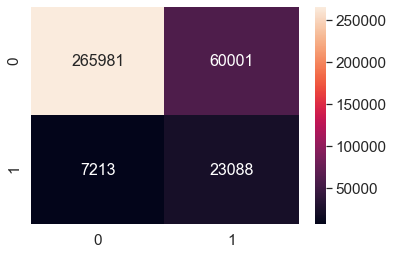

In [63]:
print(datetime.datetime.now())
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g');

### GBDT using XGBOOST

In [64]:
depth = [3,4,5]
estimators = [200,500]
cv_log_xgb = []

for d in depth:
    for e in estimators:
        print("max_depth =", d)
        print("n_estimators =", e)
        clf_xgb = xgb.XGBClassifier(booster='gbtree', random_state=0,max_depth=d,n_estimators=e,
                                objective='binary:logistic',scale_pos_weight=10 ,nthread=-1)
        clf_xgb.fit(X_train, y_train)
        xgb_pred = clf_xgb.predict(X_cv)
        cv_log_xgb.append(f1_score(y_cv, xgb_pred))
        print("F1 score of CV :",f1_score(y_cv, xgb_pred))


max_depth = 3
n_estimators = 200
F1 score of CV : 0.4654548587181254
max_depth = 3
n_estimators = 500
F1 score of CV : 0.5299057572081739
max_depth = 4
n_estimators = 200
F1 score of CV : 0.4875683301005114
max_depth = 4
n_estimators = 500
F1 score of CV : 0.5436770933362719
max_depth = 5
n_estimators = 200
F1 score of CV : 0.5080297748618574
max_depth = 5
n_estimators = 500
F1 score of CV : 0.5535762612031775


In [65]:
print("iteration no corresponds to max F1 score: ",cv_log_xgb.index(max(cv_log_xgb))+1)

iteration no corresponds to max F1 score:  6


In [66]:
#clf_xgb = MultiOutputRegressor(xgb.XGBClassifier(booster='gbtree', random_state=0,max_depth=4,n_estimators=500,nthread=-1))
clf_xgb = xgb.XGBClassifier(booster='gbtree', random_state=0,max_depth=5,n_estimators=500,objective='binary:logistic',
                            scale_pos_weight=10 ,nthread=-1)
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
y_prob = clf_xgb.predict_proba(X_test)
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f" % f1_score(y_test, y_pred))
print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tROC_AUC: %1.3f" % roc_auc_score(y_test, y_prob[:,1]))

	Precision: 0.434
	Recall: 0.777
	F1: 0.557
	Accuracy: 0.895
	ROC_AUC: 0.920


2020-06-02 09:02:12.861228


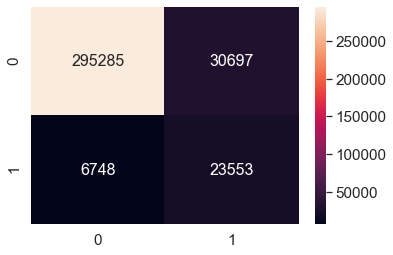

In [67]:
print(datetime.datetime.now())
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g');

### Linear Support Vector Machine (SVM)

2020-06-02 09:02:13.150709

alpha = 1e-08
Log Loss of CV : 0.15895954258841535

alpha = 1e-07
Log Loss of CV : 0.151254443301899

alpha = 1e-06
Log Loss of CV : 0.14710332995032807

alpha = 1e-05
Log Loss of CV : 0.14816463638152982

alpha = 0.0001
Log Loss of CV : 0.15904645017723823

alpha = 0.001
Log Loss of CV : 0.2138355967458384

alpha = 0.01
Log Loss of CV : 0.25143771260041586

alpha = 0.1
Log Loss of CV : 0.2602554803354538

alpha = 1
Log Loss of CV : 0.26029685161249244

alpha = 10
Log Loss of CV : 0.26029686299873256

alpha = 100
Log Loss of CV : 0.2602968629987308


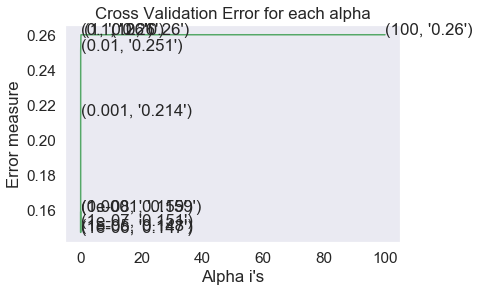


The best alpha is :  1e-06


In [68]:
print(datetime.datetime.now())
alpha = [10 ** x for x in range(-8, 3)]
cv_log = []

for i in alpha:
    print("\nalpha =", i)
    clf_svm = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42, n_jobs=-1)
    clf_svm.fit(X_train, y_train)
    sigm_clf = CalibratedClassifierCV(clf_svm, method="sigmoid")
    sigm_clf.fit(X_train, y_train)
    sigm_clf_probs = sigm_clf.predict_proba(X_cv)
    cv_log.append(log_loss(y_cv, sigm_clf_probs, labels=clf_svm.classes_, eps=1e-15))
    print("Log Loss of CV :",log_loss(y_cv, sigm_clf_probs))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log,c='g')
for i, txt in enumerate(np.round(cv_log,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha_index = np.argmin(cv_log)
print("\nThe best alpha is : ",alpha[best_alpha_index])

In [69]:
clf_svm = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha_index], penalty='l2',
                        loss='hinge', random_state=42, n_jobs=-1)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f" % f1_score(y_test, y_pred))
print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
#test_fpr, test_tpr, thr = roc_curve(y_test, y_pred)
#print("\tROC_AUC: %1.3f" % auc(test_fpr, test_tpr))
print("\tROC_AUC: %1.3f" % roc_auc_score(y_test, y_pred))

	Precision: 0.404
	Recall: 0.847
	F1: 0.547
	Accuracy: 0.881
	ROC_AUC: 0.866


2020-06-02 09:16:48.980307


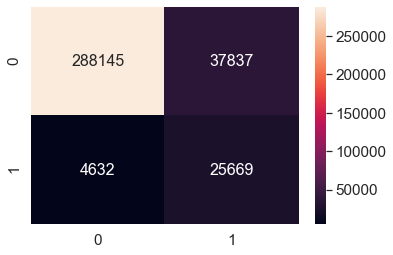

In [70]:
print(datetime.datetime.now())
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g');

### Logistic Regression

2020-06-02 09:16:49.268194

alpha = 1e-08
Log Loss of CV : 0.16101268155946538

alpha = 1e-07
Log Loss of CV : 0.1500234174425217

alpha = 1e-06
Log Loss of CV : 0.145740020263886

alpha = 1e-05
Log Loss of CV : 0.1500758150582356

alpha = 0.0001
Log Loss of CV : 0.17181276287734665

alpha = 0.001
Log Loss of CV : 0.22402514712082858

alpha = 0.01
Log Loss of CV : 0.25205087635158474

alpha = 0.1
Log Loss of CV : 0.2588818837532555

alpha = 1
Log Loss of CV : 0.2600547867287847

alpha = 10
Log Loss of CV : 0.26027898054712795

alpha = 100
Log Loss of CV : 0.26030084661255554


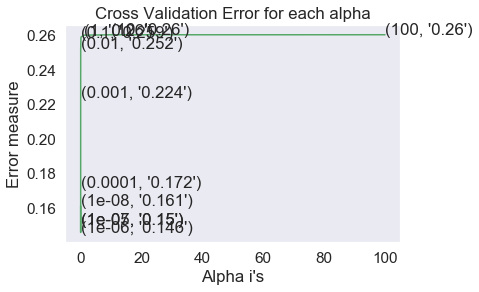


The best alpha is :  1e-06


In [71]:
print(datetime.datetime.now())
alpha = [10 ** x for x in range(-8, 3)]
cv_log = []

for i in alpha:
    print("\nalpha =", i)
    clf_lr = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=40, n_jobs=-1)
    clf_lr.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf_lr, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log.append(log_loss(y_cv, sig_clf_probs, labels=clf_lr.classes_, eps=1e-15))
    print("Log Loss of CV :",log_loss(y_cv, sig_clf_probs))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log,c='g')
for i, txt in enumerate(np.round(cv_log,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha_index = np.argmin(cv_log)
print("\nThe best alpha is : ",alpha[best_alpha_index])

In [72]:
print(datetime.datetime.now())
clf_lr = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha_index], penalty='l2', loss='log',
                       random_state=41, n_jobs=-1)
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
y_prob = clf_lr.predict_proba(X_test)
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f" % f1_score(y_test, y_pred))
print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tROC_AUC: %1.3f" % roc_auc_score(y_test, y_prob[:,1]))

2020-06-02 09:31:48.542787
	Precision: 0.437
	Recall: 0.818
	F1: 0.569
	Accuracy: 0.895
	ROC_AUC: 0.940


2020-06-02 09:31:58.989335


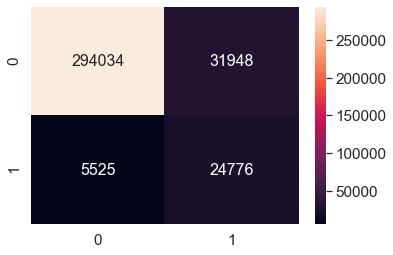

In [73]:
print(datetime.datetime.now())
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g');

### LSTM

In [74]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(1140108, 66304)
(356283, 66304)
(285028, 66304)


In [75]:
df_train['target_bool'].value_counts()

0    1050142
1    89966  
Name: target_bool, dtype: int64

In [76]:
#df_train_sampled = df_train.groupby('target_bool').apply(lambda x: x.sample(n=89966)).reset_index(drop = True)

In [77]:
#df_train_sampled['target_bool'].value_counts()
df_train['target_bool'].value_counts()

0    1050142
1    89966  
Name: target_bool, dtype: int64

In [78]:
#y_train = df_train_sampled['target_bool']
y_train = df_train['target_bool']
y_test = df_test['target_bool']
y_cv = cv_df['target_bool']

In [79]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train['treated_comment'])


#sequences_text_train = tokenizer.texts_to_sequences(df_train_sampled['treated_comment'])
sequences_text_train = tokenizer.texts_to_sequences(df_train['treated_comment'])
sequences_text_test = tokenizer.texts_to_sequences(df_test['treated_comment'])
sequences_text_cv = tokenizer.texts_to_sequences(cv_df['treated_comment'])

df_train='' 
df_test=''
cv_df=''
#df_train_sampled=''

max_len = max(len(l) for l in sequences_text_train)
pad_train = sequence.pad_sequences(sequences_text_train, maxlen=max_len)
pad_test = sequence.pad_sequences(sequences_text_test, maxlen=max_len)
pad_cv = sequence.pad_sequences(sequences_text_cv, maxlen=max_len)

In [80]:
words = Input(shape=(None,))
x = Embedding(max_words, 128, input_length=max_len)(words)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)

hidden = concatenate([
     GlobalMaxPooling1D()(x),
     GlobalAveragePooling1D()(x),
])
hidden = add([hidden, Dense(4 * 128, activation='relu')(hidden)])
hidden = add([hidden, Dense(4 * 128, activation='relu')(hidden)])
result = Dense(1, activation='sigmoid')(hidden)

model = Model(inputs=words, outputs=[result])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae','acc'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 172, 128)     1280000     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 172, 128)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 

In [81]:
print(datetime.datetime.now())
history = model.fit(pad_train, y_train.values,verbose=1, epochs=8, batch_size=1024,
                    validation_data=(pad_cv, y_cv.values))
print(datetime.datetime.now())

2020-06-02 11:47:46.195151
Train on 1140108 samples, validate on 285028 samples
Epoch 1/8
1140108/1140108 [==============================] - 286s 251us/step - loss: 0.1527 - mae: 0.0864 - acc: 0.9436 - val_loss: 0.1368 - val_mae: 0.0814 - val_acc: 0.9473
Epoch 2/8
1140108/1140108 [==============================] - 296s 259us/step - loss: 0.1325 - mae: 0.0765 - acc: 0.9486 - val_loss: 0.1356 - val_mae: 0.0840 - val_acc: 0.9482
Epoch 3/8
1140108/1140108 [==============================] - 299s 262us/step - loss: 0.1271 - mae: 0.0738 - acc: 0.9503 - val_loss: 0.1362 - val_mae: 0.0786 - val_acc: 0.9477
Epoch 4/8
1140108/1140108 [==============================] - 300s 263us/step - loss: 0.1215 - mae: 0.0710 - acc: 0.9518 - val_loss: 0.1398 - val_mae: 0.0735 - val_acc: 0.9470
Epoch 5/8
1140108/1140108 [==============================] - 301s 264us/step - loss: 0.1153 - mae: 0.0677 - acc: 0.9539 - val_loss: 0.1450 - val_mae: 0.0714 - val_acc: 0.9469
Epoch 6/8
1140108/1140108 [==================

In [82]:
y_prob = model.predict(pad_test)
y_pred=np.where(np.asarray(y_prob) >= 0.5, 1, 0)

	Precision: 0.685
	Recall: 0.522
	F1: 0.593
	Accuracy: 0.939
	ROC_AUC: 0.915
2020-06-02 13:01:21.658495


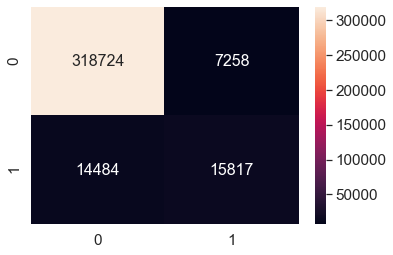

In [83]:
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f" % f1_score(y_test, y_pred))
print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))

print("\tROC_AUC: %1.3f" % roc_auc_score(y_test, y_prob))


print(datetime.datetime.now())
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g');

In [84]:
test_data = pd.read_csv('D:/APPLIEDAI/souravD/data/jigsaw-unintended-bias-in-toxicity-classification/train.csv')
test_data_cleaned = test_data['comment_text'].apply(lambda x: clean_func(x, contraction_mapping))
sequences_text_test_data = tokenizer.texts_to_sequences(test_data_cleaned)
pad_test_data = sequence.pad_sequences(sequences_text_test_data, maxlen=max_len)
test_data_pred=model.predict(pad_test_data)

In [85]:
df_submit = pd.read_csv('D:/APPLIEDAI/souravD/data/jigsaw-unintended-bias-in-toxicity-classification/sample_submission.csv')
df_submit.prediction = test_data_pred
df_submit.to_csv('submission.csv', index=False)